In [8]:
import numpy as np
from hdf5storage import loadmat, savemat 
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
outdict=loadmat('labeled_brain_source')
Labeled_brain_source=outdict['lowDimVert_labels']

In [3]:
outdict=loadmat('parcels')
parcels=outdict['parcels']

In [4]:
# remove empty labels for 3-d plotting.
parcel_cordinates = []
parcel_labels = []

for x in range(parcels.shape[0]):
    for y in range(parcels.shape[1]):
        for z in range(parcels.shape[2]):
            if parcels[x, y, z] != 0:
                parcel_cordinates.append([x, y, z])
                parcel_labels.append(parcels[x, y, z])

parcel_cordinates = np.array(parcel_cordinates)
parcel_labels = np.array(parcel_labels)
# This will take forever to complete in matlab
# Only took 30 s in python

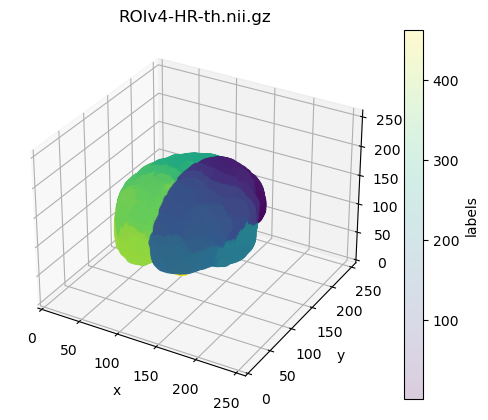

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(parcel_cordinates[:, 0], parcel_cordinates[:, 1], parcel_cordinates[:, 2],
                     c=parcel_labels, s=40, marker='o', cmap='viridis', alpha=0.2)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

cb = fig.colorbar(scatter)
cb.set_label('labels')

plt.title('ROIv4-HR-th.nii.gz')

# ax.view_init(elev=0, azim=90)  

ax.set_xlim(0, 256)
ax.set_ylim(0, 256)
ax.set_zlim(0, 256)

plt.show()